In [1]:
import tensorflow

In [2]:
# data path https://data.caltech.edu/records/mzrjq-6wc02

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [4]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\RISHYENDRA KUMAR\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
training_set = train_datagen.flow_from_directory(r'C:\Users\RISHYENDRA KUMAR\mloperation\data\cnn_dataset\train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 685 images belonging to 2 classes.


In [7]:
test_set = test_datagen.flow_from_directory(r'C:\Users\RISHYENDRA KUMAR\mloperation\data\cnn_dataset\test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 172 images belonging to 2 classes.


In [20]:
history=classifier.fit(training_set,
                         steps_per_epoch = 80,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 80)

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9656 - loss: 0.0900 - val_accuracy: 0.9651 - val_loss: 0.0848
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9687 - loss: 0.0822 - val_accuracy: 0.9535 - val_loss: 0.1101
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9569 - loss: 0.0942 - val_accuracy: 0.9709 - val_loss: 0.0727
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9709 - loss: 0.0731 - val_accuracy: 0.9942 - val_loss: 0.0422
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9766 - loss: 0.0563 - val_accuracy: 0.9826 - val_loss: 0.0537
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9843 - loss: 0.0472 - val_accuracy: 0.9826 - val_loss: 0.0463
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9776 - loss: 0.0543 - val_accuracy: 0.9477 - val_loss: 0.1420
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9778 - loss: 0.0695 - val_accuracy: 0.9767 - v

In [30]:
# Evaluate the model
val_loss, val_accuracy = classifier.evaluate(test_set)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9708 - loss: 0.0470
Validation Loss: 0.04543560743331909
Validation Accuracy: 0.9767441749572754


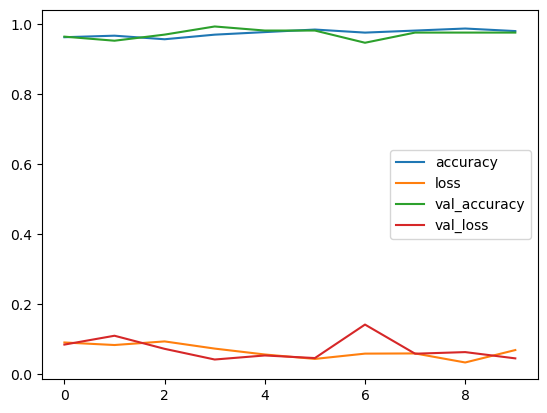

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

metrics_df=pd.DataFrame(history.history)
metrics_df.plot()
plt.show()

##### 